In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
airbnb=pd.read_csv('C:/Users/kalya/Documents/PycharmProjects/FeatureEngineering/airbnb.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [353]:
airbnb.shape

(48895, 16)

In [354]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [355]:
catcols=airbnb.select_dtypes(include='object').columns.to_list()

In [356]:
catcols

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [357]:
numcols=airbnb.select_dtypes(include='number').columns.to_list()
numcols

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [358]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [359]:
#clearly there are some outliers the max price and mini nights tells it.

In [360]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [361]:
airbnb.loc[:, airbnb.columns.isin(['name', 'host_name'])] = airbnb.loc[:, airbnb.columns.isin(['name', 'host_name'])].replace(np.nan, 'missing')

In [362]:
airbnb['last_review'] = airbnb['last_review'].replace(np.nan, '1900-01-01')

In [363]:
airbnb.loc[:,'reviews_per_month']=airbnb.loc[:,'reviews_per_month'].replace(np.nan,0)

In [364]:
airbnb['id'].nunique()  #every reservation has unique id. so no use, column to drop

48895

In [365]:
for cols in airbnb.columns:
    print(cols ,':' ,airbnb[cols].nunique())

id : 48895
name : 47906
host_id : 37457
host_name : 11453
neighbourhood_group : 5
neighbourhood : 221
latitude : 19048
longitude : 14718
room_type : 3
price : 674
minimum_nights : 109
number_of_reviews : 394
last_review : 1765
reviews_per_month : 938
calculated_host_listings_count : 47
availability_365 : 366


In [366]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [367]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [368]:
airbnb.drop(columns=['id'],inplace=True)

## Univariate Analysis

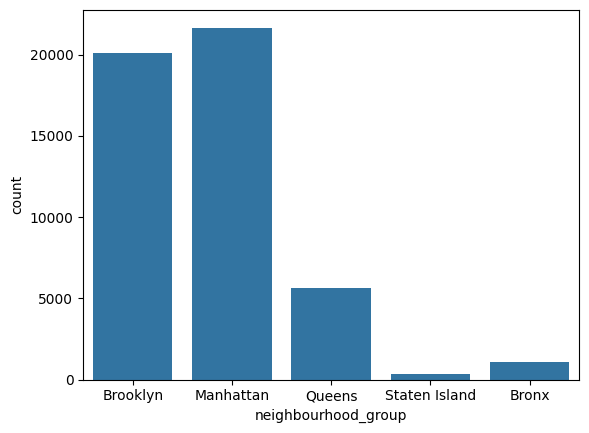

In [369]:
sns.countplot(x='neighbourhood_group',data=airbnb)
plt.show()

In [370]:
airbnb['neighbourhood'].value_counts().head(20)

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Washington Heights     899
West Village           768
Financial District     744
Flatbush               621
Clinton Hill           572
Name: count, dtype: int64

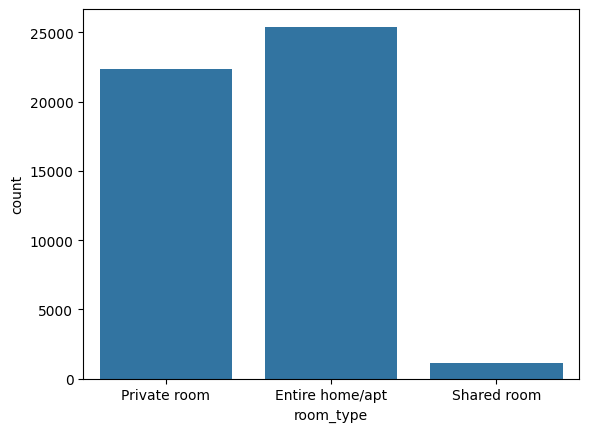

In [371]:
sns.countplot(x='room_type',data=airbnb)
plt.show()

In [372]:
removedprice=airbnb.loc[airbnb['price']<2000]

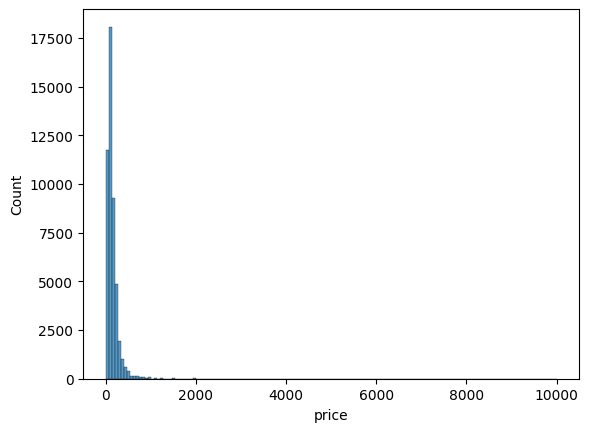

In [373]:
sns.histplot(x='price',bins=150,data=airbnb)
plt.show() 
# stay price is clustered around 75,100,150 by max 200

In [374]:
len(airbnb[airbnb['price'] > 1000]) # to drop

239

In [375]:
reducednights=airbnb[airbnb['minimum_nights']<=100]

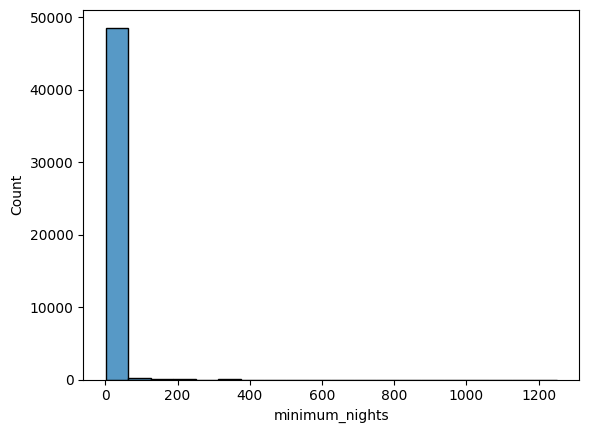

In [376]:
sns.histplot(x='minimum_nights',bins=20,data=airbnb)
plt.show() #people stay 1,2,3 then 4 ,5 nd 30

In [377]:
len(airbnb[airbnb['minimum_nights']>100]) #to drop

174

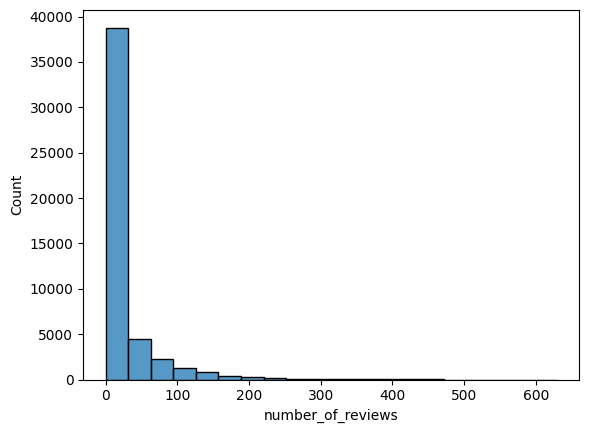

In [378]:
sns.histplot(x='number_of_reviews',bins=20,data=airbnb) #0 to 25
plt.show() 

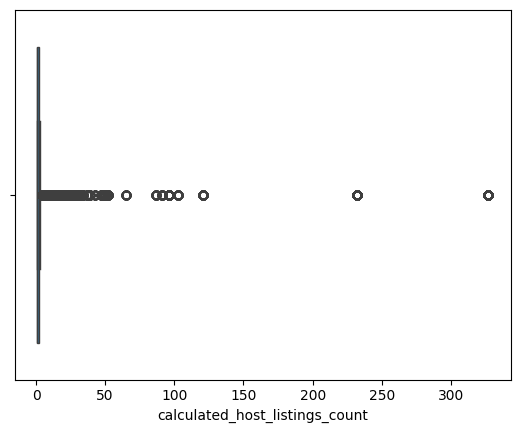

In [379]:
sns.boxplot(x='calculated_host_listings_count',data=airbnb) #0 to 2 only
plt.show() 

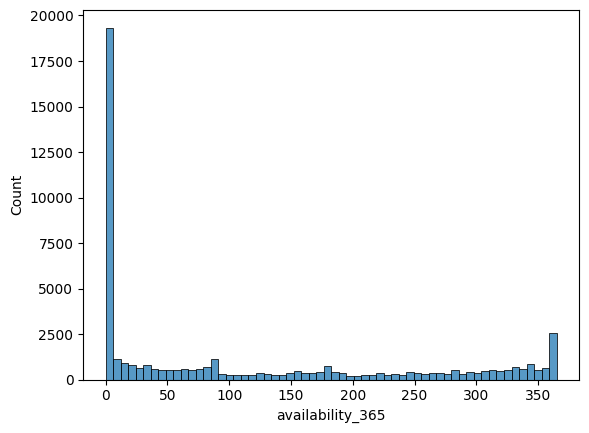

In [380]:
sns.histplot(x='availability_365',bins=60,data=airbnb) #property unavailablity is quite high
plt.show()

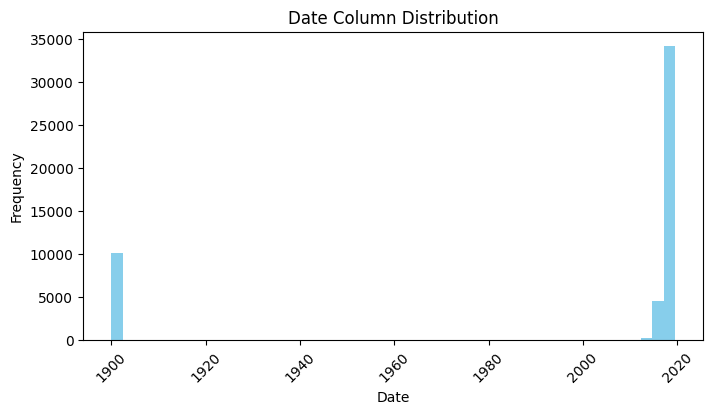

In [381]:
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])

# Plot distribution
plt.figure(figsize=(8, 4))
plt.hist(airbnb['last_review'],bins=50, color='skyblue')
plt.title('Date Column Distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

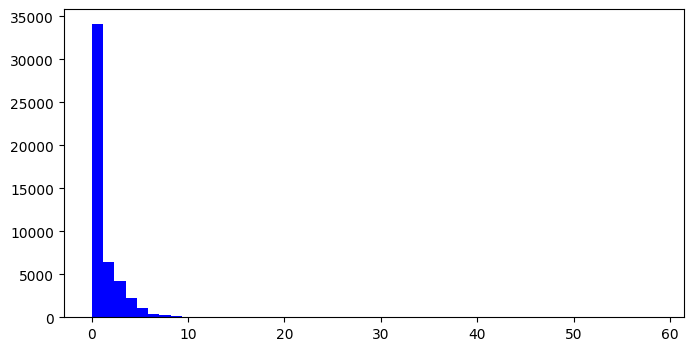

In [382]:
plt.figure(figsize=(8, 4))
plt.hist(airbnb['reviews_per_month'],bins=50, color='blue')
plt.show()

## Bivariate Analysis 

In [383]:
#Manhattan is pricey neighbourhood,Queena and Bronx are cheapest
#Manhattan has large number of entire home/apt type rooms . and much lesser private rooms
#Brooklyn has little more private rooms than entire home


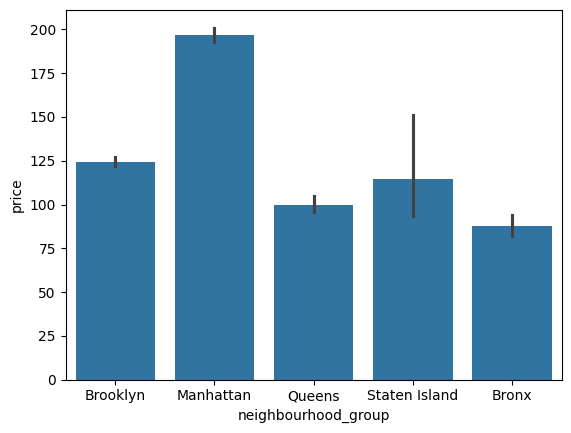

In [384]:
sns.barplot(x='neighbourhood_group',y='price',data=airbnb)
plt.show()

In [385]:
neigh_roomtype=airbnb.groupby(['neighbourhood_group','room_type']).size()

In [386]:
neigh_roomtype

neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
dtype: int64

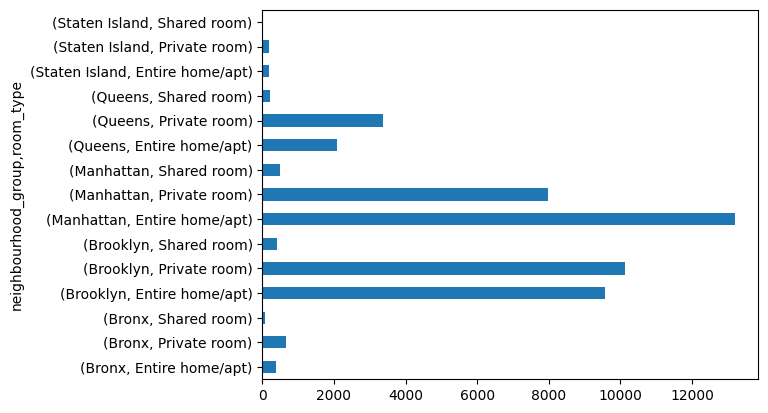

In [387]:
neigh_roomtype.plot(kind='barh',stacked=True,)
plt.show()

## AVG price based on room type and neighb group

In [388]:
neigh_roomprice=airbnb.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()

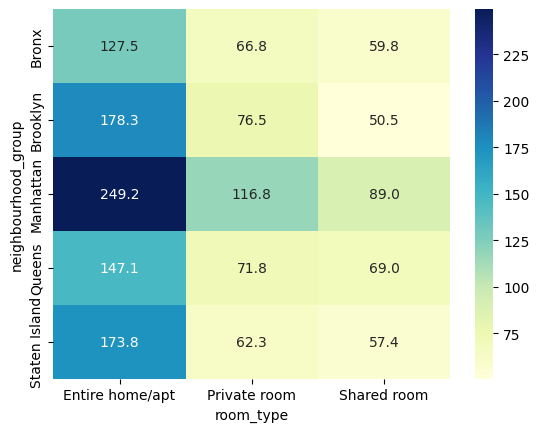

In [389]:
table=neigh_roomprice.pivot_table(index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean')
sns.heatmap(data=table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.show()

In [390]:
#Entire home cheapest in Bronx
#Private cheapest in staten island
#shared room cheapest in Brooklyn
#Bronx is the cheapest overall.
#staten isalnd entire home is much pricer whereas private and shared are less pricey
#all room types pricy in manhattan

In [391]:
neigh_nights=airbnb.groupby(['neighbourhood_group','minimum_nights']).size().reset_index()

In [392]:
neigh_nights

,neighbourhood_group,minimum_nights,0
0,Bronx,1,362
1,Bronx,2,357
2,Bronx,3,180
3,Bronx,4,36
4,Bronx,5,55
...,...,...,...
241,Staten Island,21,1
242,Staten Island,30,15
243,Staten Island,31,2
244,Staten Island,33,1


In [393]:
neight_pivot=neigh_nights.pivot_table(index='minimum_nights',columns='neighbourhood_group').fillna(0)

Text(0.5, 1.0, 'Minimum Nights by Neighbourhood Group')

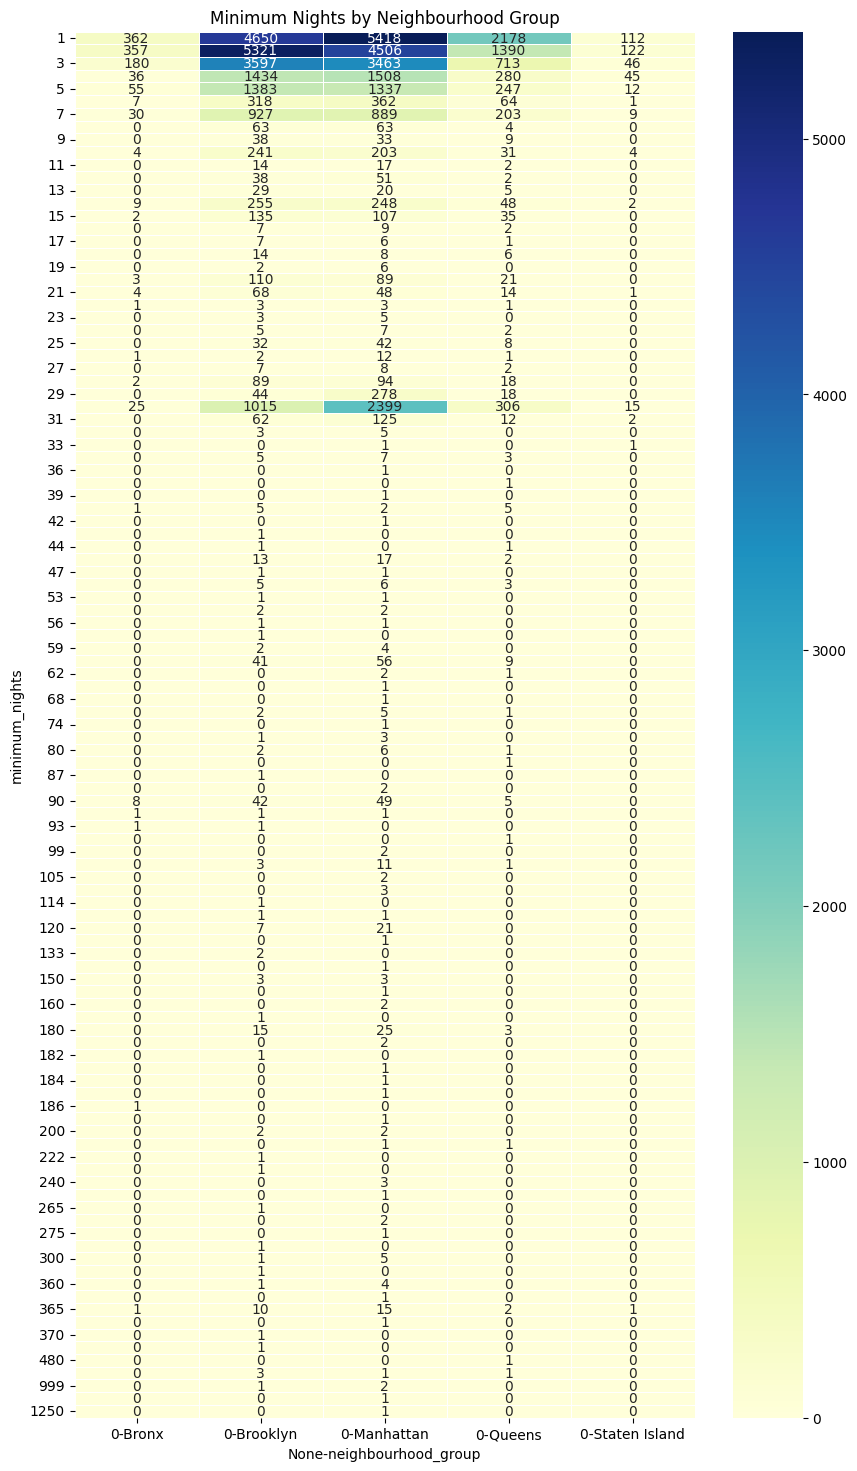

In [394]:
plt.figure(figsize=(10, 18))
sns.heatmap(neight_pivot, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
plt.title('Minimum Nights by Neighbourhood Group')
#manhattan very costly so ppl book 1 night more whereas the count for 2 or 3 nights is higher in brooklyn
#booking trend= (1to 3),(4or 5),a week,10 days, 2weeks or 15 days,20 days,28,29,30,at times 31...2 months,3 months,6 months, 1 year

## Length of Stay Patterns on what type of room

In [395]:
bins=[0,1,3,5,7,10,15,20,30,60,90,180,365,float('inf')]
labels = ['1 D', '2-3 D', '4-5 D', '6-7 D','8-10 D','11-15 D','16-20 D','21-30 D','1-2 M','2-3 M','3-6 M', '6M-1Y', '> 1Y']
airbnb['minimum_nights_category'] = pd.cut(airbnb['minimum_nights'], bins=bins, labels=labels, right=True)


In [396]:
nr_nights=airbnb.groupby(['neighbourhood_group','room_type','minimum_nights_category']).size().reset_index()

In [397]:
nr_nights.rename(columns={0: 'count'}, inplace=True)

In [398]:
nr_nights

,neighbourhood_group,room_type,minimum_nights_category,count
0,Bronx,Entire home/apt,1 D,85
1,Bronx,Entire home/apt,2-3 D,210
2,Bronx,Entire home/apt,4-5 D,37
3,Bronx,Entire home/apt,6-7 D,18
4,Bronx,Entire home/apt,8-10 D,1
...,...,...,...,...
190,Staten Island,Shared room,1-2 M,0
191,Staten Island,Shared room,2-3 M,0
192,Staten Island,Shared room,3-6 M,0
193,Staten Island,Shared room,6M-1Y,0


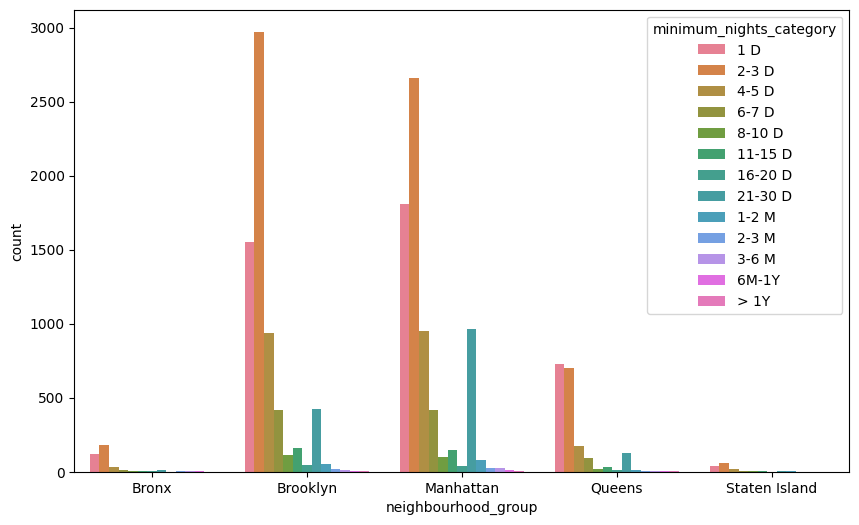

In [399]:
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='count', hue='minimum_nights_category', data=nr_nights,errorbar=None)
plt.show()# people trend is planning trips is either 2 or 3 days, 4/5week or a month

## Time Pattern of hotel bookings based on room type

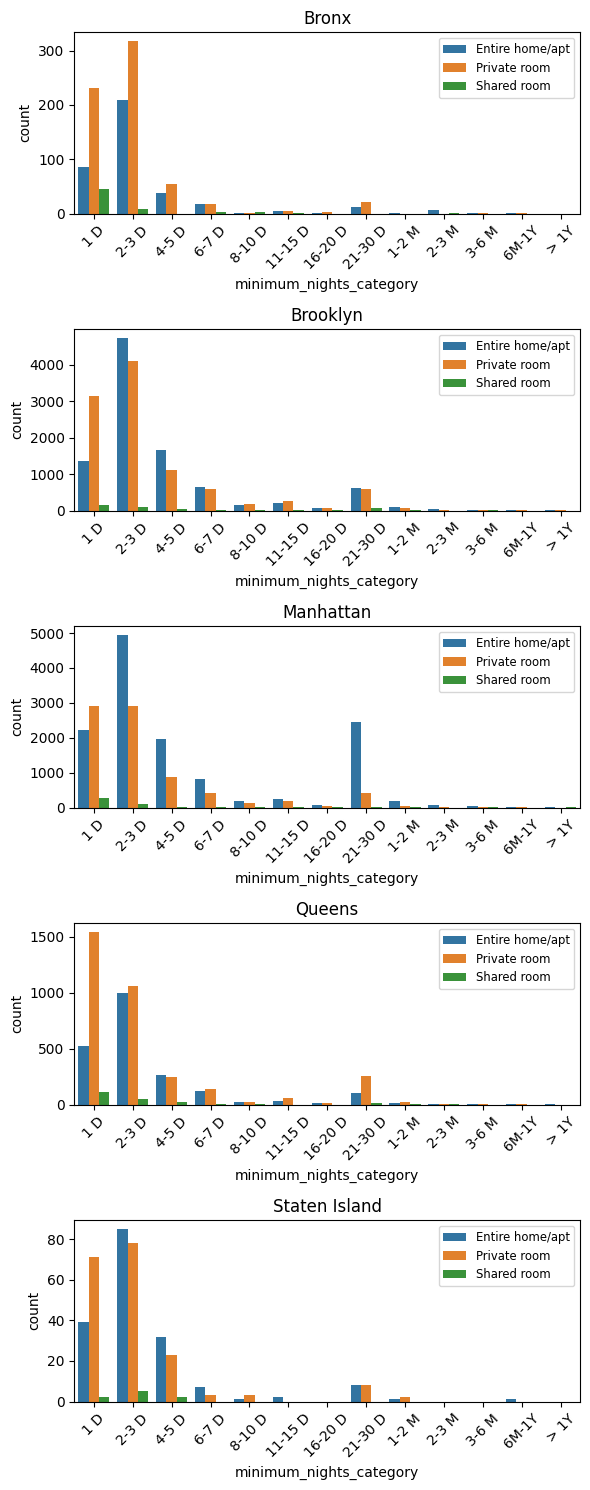

In [400]:
fig,ax=plt.subplots(5,1,figsize=(6,15))
for i, group in enumerate(nr_nights['neighbourhood_group'].unique()):
    sns.barplot(x='minimum_nights_category', y='count', hue='room_type',
                data=nr_nights[nr_nights['neighbourhood_group'] == group],
                errorbar=None, ax=ax[i])
    ax[i].set_title(group)
    ax[i].legend(fontsize='small')
    ax[i].tick_params(axis='x',rotation=45)
fig.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
#BROOKLYN
#for 2 to 3 days ppl perfer private room ,if days are more they choose entire home
#MANHATTAN
# entire home is perfered irrespective of days of stay
#Queens - private room peferred
#GENERALLY WITH more days of stay ppl tend to choose entire home, with less than 2 or 3 days private home is chosen

## Neighbourhood Perference Analysis based on groups

In [401]:
neigbhood=airbnb.groupby(['neighbourhood_group','neighbourhood']).agg({'price':['size','mean']}).reset_index()

In [402]:
neigbhood

neighbourhood_group  neighbourhood price            
                                        size        mean
0                 Bronx       Allerton    42   87.595238
1                 Bronx     Baychester     7   75.428571
2                 Bronx        Belmont    24   77.125000
3                 Bronx      Bronxdale    19   57.105263
4                 Bronx    Castle Hill     9   63.000000
..                  ...            ...   ...         ...
216       Staten Island    Tottenville     7  144.857143
217       Staten Island  West Brighton    18   80.555556
218       Staten Island    Westerleigh     2   71.500000
219       Staten Island    Willowbrook     1  249.000000
220       Staten Island        Woodrow     1  700.000000

[221 rows x 4 columns]

## finding which neighbhood is costly in every group

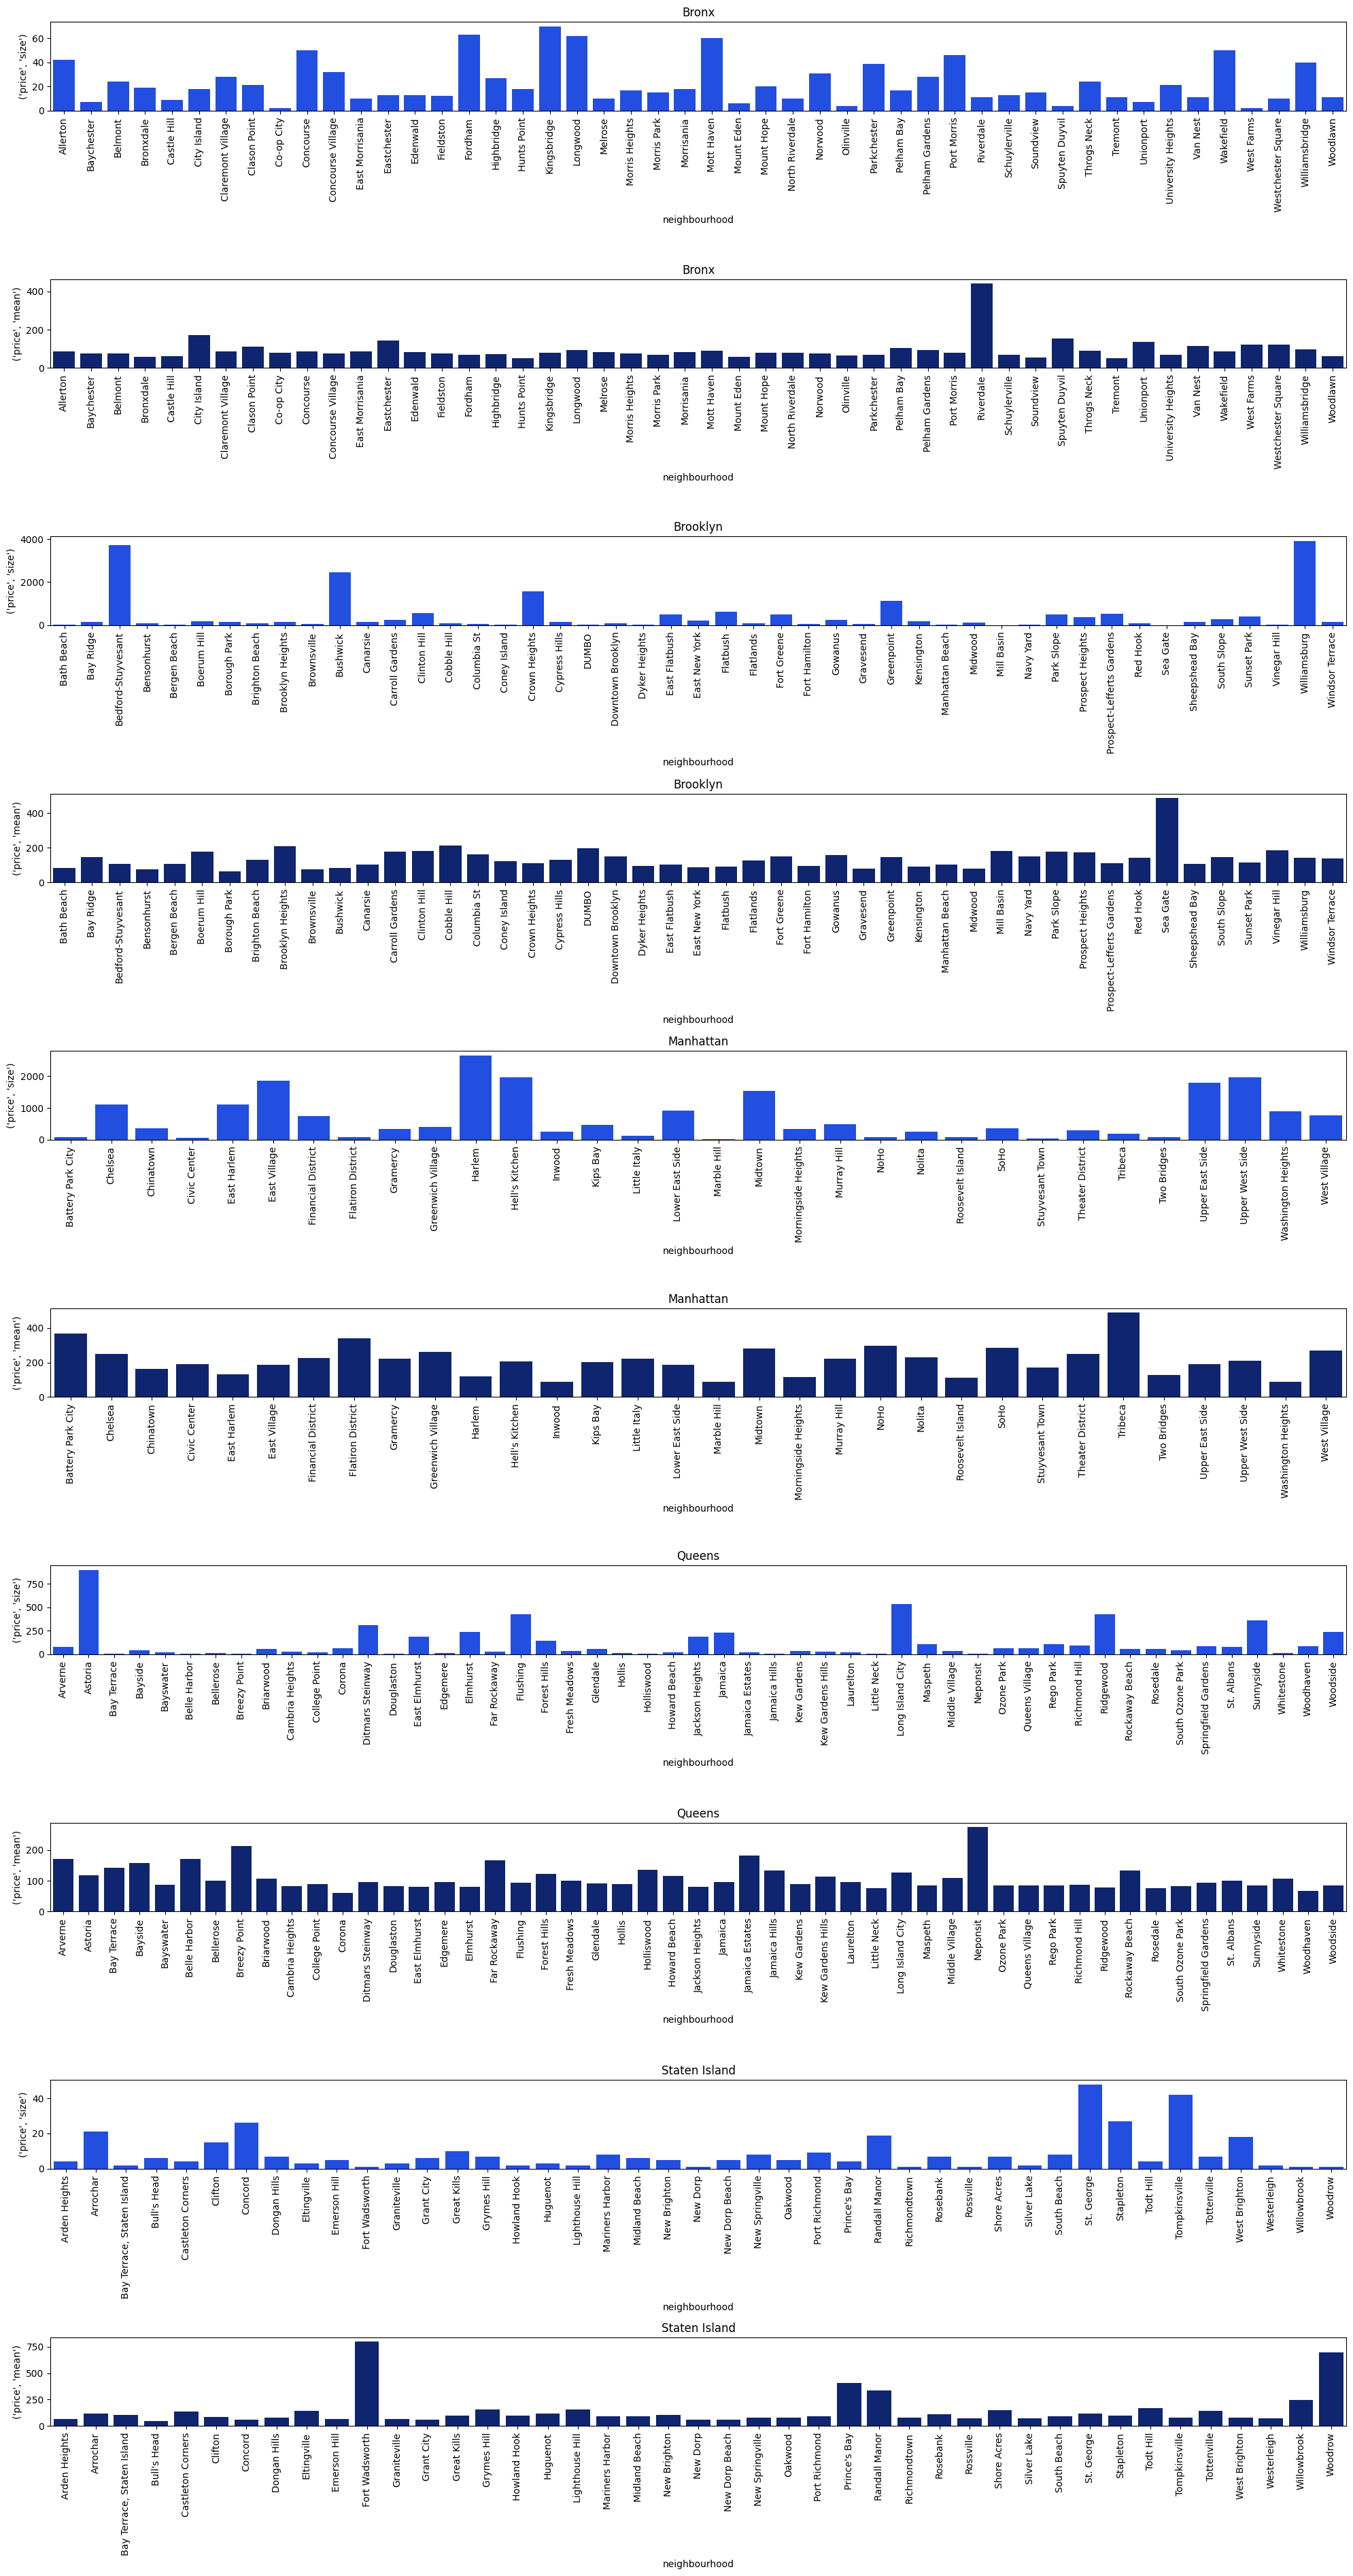

In [403]:
fig,ax=plt.subplots(10,1,figsize=(20, 38))
for i,group in enumerate(neigbhood['neighbourhood_group'].unique()):
     sns.barplot(x='neighbourhood',y=('price', 'size'),hue='neighbourhood_group',data=neigbhood[neigbhood['neighbourhood_group']==group],palette='bright',errorbar=None,ax=ax[2*i],legend=False)
     ax[2*i].set_title(group)
     ax[2*i].tick_params(axis='x',rotation=90)

     sns.barplot(x='neighbourhood',y=('price', 'mean'),hue='neighbourhood_group',data=neigbhood[neigbhood['neighbourhood_group']==group],palette='dark',errorbar=None,ax=ax[2*i+1],legend=False)
     ax[2*i+1].set_title(group)
     ax[2*i+1].tick_params(axis='x',rotation=90)
fig.tight_layout()
plt.show()

## Neigbhood group Vs Availablity

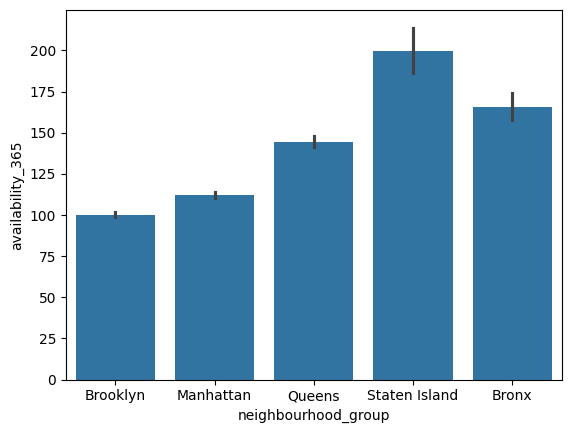

In [404]:
sns.barplot(x='neighbourhood_group',y='availability_365',data=airbnb)
plt.show() #brooklyn and manhattan has lesser availability

## Room type Vs Availability

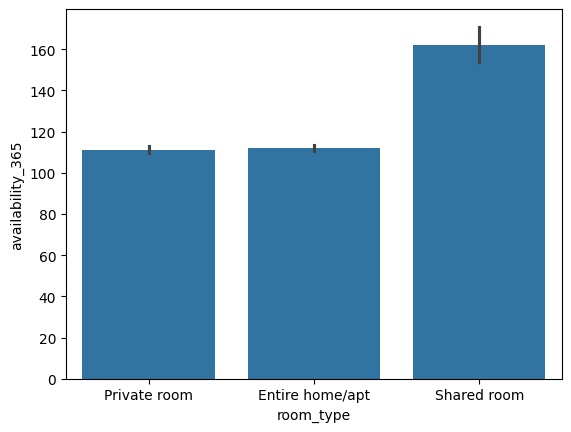

In [405]:
sns.barplot(x='room_type',y='availability_365',data=airbnb)
plt.show()

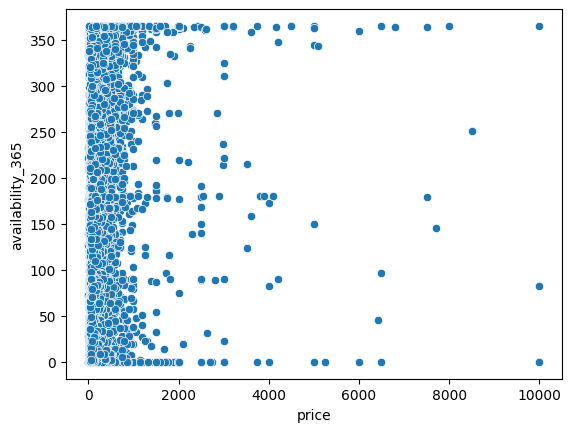

In [406]:
sns.scatterplot(x='price',y='availability_365',data=airbnb)
plt.show() #no much correlation price  to 1k are varing from 0 to 365..some airbnb are not ar alll available,some available 365 for all price range..

## Neigh group and host count

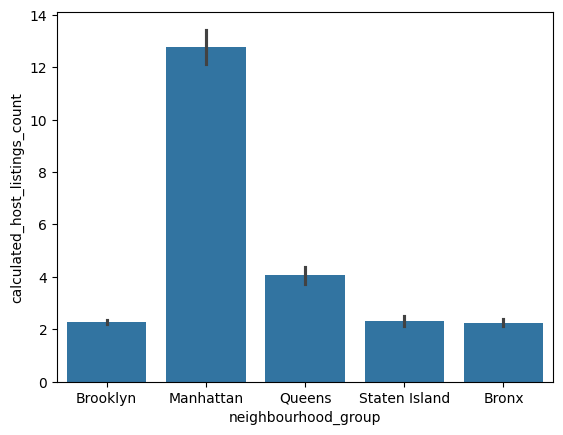

In [407]:
sns.barplot(x='neighbourhood_group',y='calculated_host_listings_count',data=airbnb)
plt.show()# manhattan host have many counts

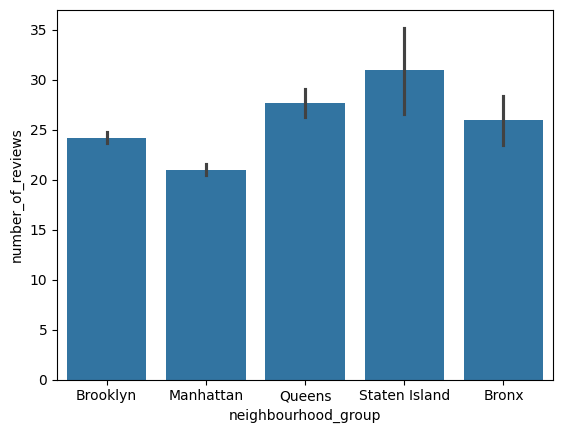

In [408]:
sns.barplot(x='neighbourhood_group',y='number_of_reviews',data=airbnb)
plt.show()# state island gives more reviews followed by Queens

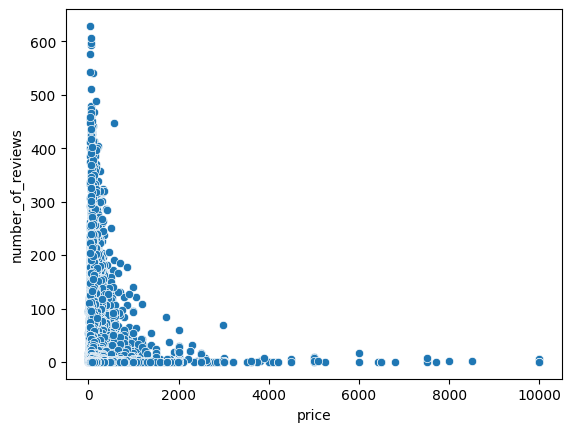

In [409]:
sns.scatterplot(x='price',y='number_of_reviews',data=airbnb)
plt.show()#lower price airbnb gets more reviews

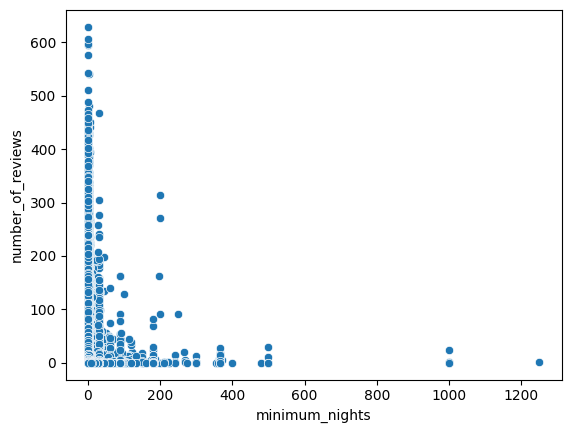

In [410]:
sns.scatterplot(x='minimum_nights',y='number_of_reviews',data=airbnb)
plt.show()#again lower the nights more the reviews

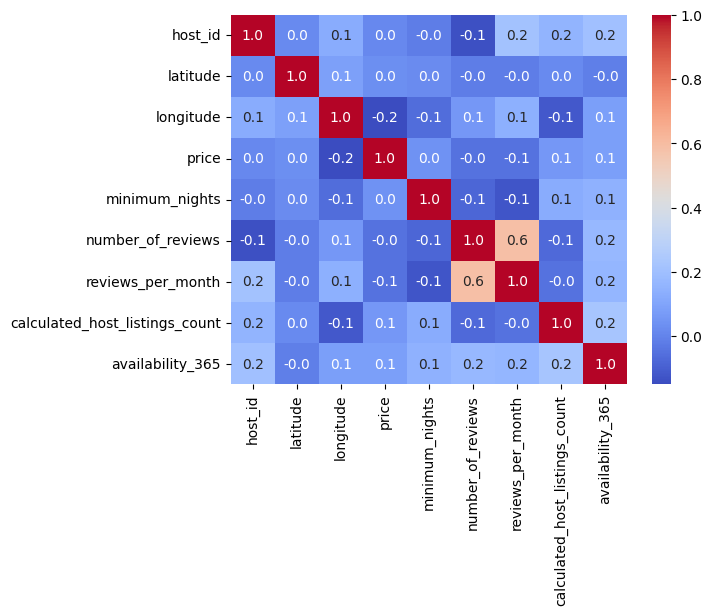

In [411]:
corr_matrix=airbnb[['host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".1f")
plt.show()

In [412]:
airbnb.groupby(['host_id','host_name','neighbourhood_group','minimum_nights'])['price'].sum().nlargest(10)

host_id    host_name       neighbourhood_group  minimum_nights
107434423  Blueground      Manhattan            30                67378
219517861  Sonder (NYC)    Manhattan            2                 53726
30283594   Kara            Manhattan            30                30624
156158778  Sally           Manhattan            1                 29194
219517861  Sonder (NYC)    Manhattan            29                29069
12243051   Sonder          Manhattan            29                20451
16098958   Jeremy & Laura  Manhattan            30                20060
836168     Henry           Manhattan            30                19500
3750764    Kevin           Manhattan            1                 18780
22541573   Ken             Manhattan            30                18541
Name: price, dtype: int64

In [413]:
airbnb.groupby(['host_id','host_name','neighbourhood_group'])['price'].sum().nsmallest(10)

host_id   host_name          neighbourhood_group
10132166  Aymeric            Brooklyn                0
13709292  Qiuchi             Manhattan               0
647528    Caterina           Brooklyn               10
11967922  Vishanti & Jeremy  Brooklyn               10
33511962  Morgan             Manhattan              10
47336995  Mario              Manhattan              10
52777892  Amy                Manhattan              10
62685070  Katie              Brooklyn               10
84497333  Jennifer           Manhattan              10
91034542  Maureen            Manhattan              10
Name: price, dtype: int64

## Feature Engg

In [414]:
airbnb.drop(columns=['name', 'host_id', 'host_name','latitude', 'longitude','last_review','number_of_reviews'],inplace=True)

In [415]:
airbnb.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,minimum_nights_category
0,Brooklyn,Kensington,Private room,149,1,0.21,6,365,1 D
1,Manhattan,Midtown,Entire home/apt,225,1,0.38,2,355,1 D
2,Manhattan,Harlem,Private room,150,3,0.00,1,365,2-3 D
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,4.64,1,194,1 D
4,Manhattan,East Harlem,Entire home/apt,80,10,0.10,1,0,8-10 D


In [416]:
airbnb.drop(columns=['minimum_nights'],inplace=True)

In [417]:
dummy_columns = pd.get_dummies(airbnb['neighbourhood_group'])
airbnb = pd.concat([airbnb, dummy_columns], axis=1)

In [418]:
airbnb.drop(columns=['neighbourhood_group'],inplace=True)

In [419]:
#frequency encoding for neighourhood
freq=airbnb['neighbourhood'].value_counts(normalize=True)
airbnb['encoded_neighbourhood']=airbnb['neighbourhood'].map(freq)

In [420]:
airbnb.drop(columns=['neighbourhood'],inplace=True)

In [421]:
#cat codes for room type
dum_col=pd.get_dummies(airbnb['room_type'])
airbnb=pd.concat([airbnb,dum_col],axis=1)

In [422]:
airbnb.drop(columns=['room_type'],inplace=True)

In [423]:
airbnb.head(3)

,price,reviews_per_month,calculated_host_listings_count,availability_365,minimum_nights_category,Bronx,Brooklyn,Manhattan,Queens,Staten Island,encoded_neighbourhood,Entire home/apt,Private room,Shared room
0,149,0.21,6,365,1 D,False,True,False,False,False,0.003579,False,True,False
1,225,0.38,2,355,1 D,False,False,True,False,False,0.031598,True,False,False
2,150,0.00,1,365,2-3 D,False,False,True,False,False,0.054361,False,True,False


In [424]:
columns=['Bronx','Brooklyn','Manhattan','Queens','Staten Island','Entire home/apt','Private room','Shared room']
dic={True:1,False:0}
for col in airbnb[columns]:
    airbnb[col]=airbnb[col].map(dic)

In [425]:
sorted_categories = [
    '1 D', '2-3 D', '4-5 D', '6-7 D', '8-10 D', '11-15 D', '16-20 D', '21-30 D', 
    '1-2 M', '2-3 M', '3-6 M', '6M-1Y', '> 1Y'
]

# Create the mapping dictionary
category_to_ordinal = {category: index for index, category in enumerate(sorted_categories)}

print("Category to Ordinal Mapping:")
print(category_to_ordinal)

Category to Ordinal Mapping:
{'1 D': 0, '2-3 D': 1, '4-5 D': 2, '6-7 D': 3, '8-10 D': 4, '11-15 D': 5, '16-20 D': 6, '21-30 D': 7, '1-2 M': 8, '2-3 M': 9, '3-6 M': 10, '6M-1Y': 11, '> 1Y': 12}


In [426]:
airbnb['minimum_nights_category']=airbnb['minimum_nights_category'].map(category_to_ordinal)

In [427]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
airbnb_scaled = scaler.fit_transform(airbnb)

# Convert the scaled data back to a DataFrame
airbnb_scaled_df = pd.DataFrame(airbnb_scaled, columns=airbnb.columns)

In [430]:
airbnb_scaled_df.head()

,reviews_per_month,calculated_host_listings_count,availability_365,minimum_nights_category,Bronx,Brooklyn,Manhattan,Queens,Staten Island,encoded_neighbourhood,Entire home/apt,Private room,Shared room,price
0,-0.551511,-0.034716,1.916250,-0.824476,-0.151071,1.196705,-0.891833,-0.362035,-0.087677,-1.065787,-1.040134,1.090893,-0.155887,-0.015493
1,-0.445079,-0.156104,1.840275,-0.824476,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,0.024112,0.961415,-0.916680,-0.155887,0.300974
2,-0.682986,-0.186451,1.916250,-0.371996,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,0.909556,-1.040134,1.090893,-0.155887,-0.011329
3,2.221978,-0.186451,0.617065,-0.824476,-0.151071,1.196705,-0.891833,-0.362035,-0.087677,-0.749955,0.961415,-0.916680,-0.155887,-0.265335
4,-0.620379,-0.186451,-0.856865,0.985441,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,-0.316382,0.961415,-0.916680,-0.155887,-0.302811


## predicting the price linear regression

In [429]:
desired_columns=list(airbnb_scaled_df.columns.drop('price'))+['price']
airbnb_scaled_df=airbnb_scaled_df.reindex(columns=desired_columns)

In [432]:
X=airbnb_scaled_df.iloc[:,:-1].values
y=airbnb_scaled_df.iloc[:,-1].values

In [433]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [434]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [435]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'Mean Squared Error': mse,
        'R^2 Score': r2
    }

# Print results
print("Model Evaluation Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  Mean Squared Error: {metrics['Mean Squared Error']:.4f}")
    print(f"  R^2 Score: {metrics['R^2 Score']:.4f}")

Model Evaluation Results:

Linear Regression:
  Mean Squared Error: 0.8514
  R^2 Score: 0.1078

Ridge Regression:
  Mean Squared Error: 0.8515
  R^2 Score: 0.1078

Lasso Regression:
  Mean Squared Error: 0.9543
  R^2 Score: -0.0000

Decision Tree:
  Mean Squared Error: 1.5805
  R^2 Score: -0.6562

Random Forest:
  Mean Squared Error: 0.9146
  R^2 Score: 0.0416

Support Vector Regression:
  Mean Squared Error: 0.8552
  R^2 Score: 0.1039

K-Nearest Neighbors:
  Mean Squared Error: 0.9013
  R^2 Score: 0.0555
